# Week 12 handin

## Exercise1:

### 1. Generate 2 blobs with sklearns make_blobs(n_samples=150, centers=2, n_features=2, cluster_std=0.5, random_state=0)

a) Look at the dataset (Show the first line of the matrix)

b) Print the target

### 2. Scatterplot the dataset with matplotlib

a) Use different colors for each of the n_features=, created in the blob data. - I use red and green

### 3. Use the activation_function and perceptron fuction given in the 12-1-Perceptron-Classifier

### 4. Use the pla function given in the 12-1-Perceptron-Classifier

### 5. In exercise 1.b we found out that our data_blob set only contains 1 and 0 as target values

a) Turn all the 0's into -1's. Now when we print our target, we should only have, 1 and -1

b) Turn all the new targets with our daata into an array that has the following format;

[(array([data.x, data.y]), 1), (array([data.x, data.y]), -1)]

Note that the 1 and -1 are our target values

### 6. Using the pla function that we used copied in before, find the learned_weights of our training data from 5.b

### 7. Use the predict function given in 12-1-Perceptron-Classifier

a) Try to see if we can predict a couple of values to be either 1 or -1

### 8. Visualize the linear seperability by using the compute_line function given in 12-1-Perceptron-Classifier

## 02 Status

Completed All Tasks in excercise 1

## Solutions


In [2]:

from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

### 1 Generate 2 blobs with sklearns make_blobs.


In [3]:
data, target = make_blobs(n_samples=150, centers=2, n_features=2, cluster_std=0.5, random_state=0)
print(data[0:1,:])
print(len(data),len(target))
print(target)
print(data)

[[2.4484315  0.66445411]]
150 150
[1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0
 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1
 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1
 0 1]
[[ 2.4484315   0.66445411]
 [ 1.44989606  4.22628228]
 [ 0.99914934  4.2101954 ]
 [ 1.2091013   3.53566548]
 [ 1.89982444  0.94636374]
 [ 1.40883907  1.03118909]
 [ 1.05374379  4.49286859]
 [ 1.06498315  4.10289686]
 [ 2.80250979 -0.13732885]
 [ 0.802314    4.38196181]
 [ 0.5323772   3.31338909]
 [ 2.13352079  1.01375418]
 [ 2.4411628   1.30941574]
 [ 2.03562611  0.31361691]
 [ 2.52997792  0.94143928]
 [ 0.16932115  4.19741719]
 [ 0.12313498  5.27917503]
 [ 2.00604126  0.56592452]
 [ 1.34323707  0.65100372]
 [ 2.31690585  0.81189049]
 [ 1.72330962  4.2012082 ]
 [ 0.92466065  4.50908658]
 [ 0.65910903  4.12241674]
 [ 1.72906323  0.70218697]
 [ 1.7365490

### 2 Scatterplot the dataset with matplotlib

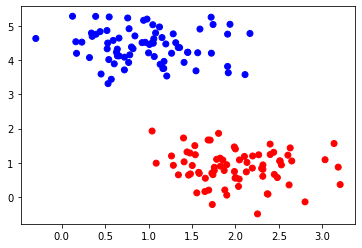

In [4]:
plt.scatter(data[:,0], data[:,1], c=target, cmap=colors.ListedColormap(["blue", "red"]))

### 3 Use the "activation_function" and "perceptron" fuction given in the "12-1-Perceptron-Classifier".


In [9]:
def activation_function(x):
    """
    Step function to respond with y = 1 or -1
    Parameter:
    x: An x (numeric) value that will have a corresponding y value of 1 or -1
    """
    if x < 0:
        return -1
    else:
        return 1

def perceptron(inp, weights):
    """
    Given a list of feature (x) values and a list of weights, 
    calculates the dot product of the 2 lists and returns 1 or -1 (fire or don't)
    Parameters:
    inp: vector of input predictors
    weights: vector of weights to be ajusted for precise prediction of output.
    """
    dot_product = np.dot(inp, weights)
    output = activation_function(dot_product)
    return output

### 4 Use the "pla" function given in the "12-1-Perceptron-Classifier".


In [10]:
from tqdm import tqdm
def pla(training_data, no_iterations=1000000, eta=0.5):
    """
    Find the proper weights to use in the perceptron based on data and target
    Parameters:
    training_data: list of vectors (features), as predictors zipped with a target value
    no_iterations: number of times to adjust the weights to get them as close as possible to the optimal number
    eta: the learning rate (prevent learning to go pendulum from one extreme error to the opposite)
    """
    dim = len(training_data[0][0])
    weights =  np.random.random(dim)
    error = np.random.random()
    weight_history = [np.copy(weights)]
    for i in tqdm(range(no_iterations)):
        inp_vec, expected_label = training_data[i % len(training_data)]
        perceptron_output = perceptron(inp_vec, weights) 
        error = expected_label - perceptron_output  
        weights += eta * error * inp_vec
        weight_history.append(np.copy(weights))
    return weights, weight_history

### 5 In exercise 1 we found out that our data_blob set only contains 1 and 0 as target values.


In [6]:
target[target == 0] = -1
print(target)
trainings_data_blobs = [(d, t) for d, t in zip(data, target)]
print(trainings_data_blobs)

[ 1 -1 -1 -1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1 -1  1
  1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1
 -1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1
 -1 -1 -1  1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1  1  1 -1  1
 -1 -1  1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1 -1  1 -1 -1  1 -1  1  1
  1  1 -1  1 -1  1]
[(array([2.4484315 , 0.66445411]), 1), (array([1.44989606, 4.22628228]), -1), (array([0.99914934, 4.2101954 ]), -1), (array([1.2091013 , 3.53566548]), -1), (array([1.89982444, 0.94636374]), 1), (array([1.40883907, 1.03118909]), 1), (array([1.05374379, 4.49286859]), -1), (array([1.06498315, 4.10289686]), -1), (array([ 2.80250979, -0.13732885]), 1), (array([0.802314  , 4.38196181]), -1), (array([0.5323772 , 3.31338909]), -1), (array([2.13352079, 1.01375418]), 1), (array([2.4411628 , 1.30941574]), 1), (array([2.03562611, 0.31361691]), 1), 

### 6 Using the pla function that we used copied in before, find the learned_weights of our training data from 5.b


In [11]:
learned_weights, weight_history = pla(trainings_data_blobs)
print(learned_weights)

100%|██████████| 1000000/1000000 [00:12<00:00, 81293.89it/s][ 21.04783747 -12.81937011]



### 7 Use the "predict" function given in "12-1-Perceptron-Classifier".


In [12]:
def predict(inp_vec, weights):
    """
    Parameters:
    inp_vec:
        An input vector consisting of y and x
    weights:
        A vector of same length as inp_vec, containing a weight for each input
    return:
        A class label, either 1(red) or -1(green)
    """
    class_label_prediction = perceptron(inp_vec, weights)
    return class_label_prediction

print(predict([1, 1], learned_weights))
print(predict([0, 2], learned_weights))
print(predict([1, 3], learned_weights))
print(predict([4, 4], learned_weights))
print(predict([3, 5], learned_weights))
print(predict([6, 6], learned_weights))

1
-1
-1
1
-1
1


### 8 Visualize the linear seperability by using the "compute_line" function given in "12-1-Perceptron-Classifier".

(1.6418776658243592, 0.8540607855686134)


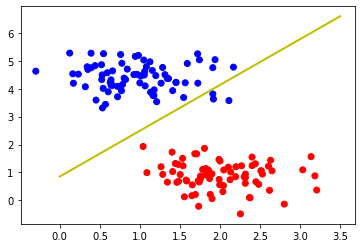

In [15]:
def compute_line(weights):
    norm = np.linalg.norm(weights)
    ww = weights / norm
    ww1 = [ww[1], -ww[0]]
    ww2 = [-ww[1] , ww[0]]
    m = (ww2[1] - ww1[1]) / (ww2[0] - ww1[0])
    b = ((ww2[0] - ww1[0]) * m) + ww1[1]
    return m, b


print(compute_line(learned_weights))
plt.scatter(data[:,0], data[:,1], c=target, cmap=colors.ListedColormap(["blue", "red"]))

l = np.linspace(0, 3.5)
m, b = compute_line(learned_weights)
plt.plot(l, m * l + b, 'y-', lw=2)
